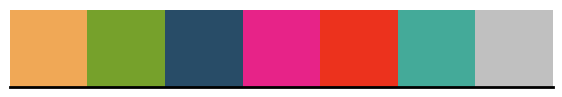

In [2]:
%load_ext autoreload
%autoreload 2
from fray_benchmark.visualizer.bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

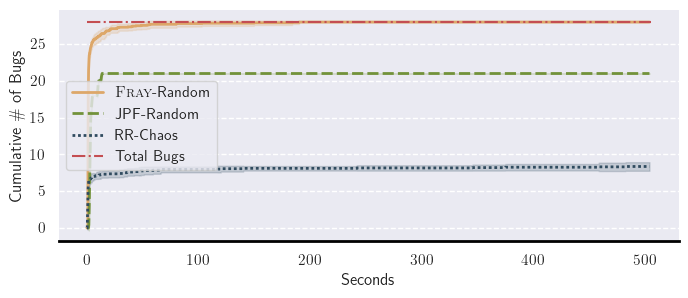

In [11]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/sctbench"])
# display(suite.to_aggregated_dataframe())
ax = suite.generate_bug_over_time_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

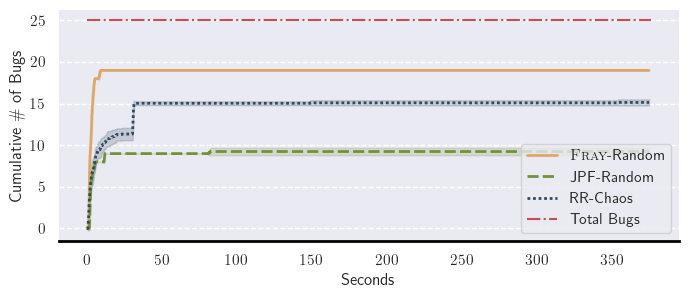

In [11]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe"])
ax = suite.generate_bug_over_time_fig("time")
# fig = ax.get_figure()
# fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

['sctbench-5', 'sctbench-8', 'sctbench-10', 'sctbench-11', 'sctbench-12', 'sctbench-21', 'sctbench-20', 'sctbench-13', 'sctbench-4', 'sctbench-7', 'sctbench-19', 'sctbench-9', 'sctbench-26', 'sctbench-22', 'sctbench-27', 'sctbench-25', 'sctbench-6', 'sctbench-0', 'sctbench-24', 'sctbench-15', 'sctbench-16', 'sctbench-17', 'sctbench-18', 'sctbench-14', 'sctbench-23', 'sctbench-3', 'sctbench-1', 'sctbench-2', 'jacontebe-0', 'jacontebe-12', 'jacontebe-14', 'jacontebe-18', 'jacontebe-19', 'jacontebe-1', 'jacontebe-10', 'jacontebe-21', 'jacontebe-3', 'jacontebe-4', 'jacontebe-6', 'jacontebe-7', 'jacontebe-9', 'jacontebe-15', 'jacontebe-20', 'jacontebe-16', 'jacontebe-17', 'jacontebe-5', 'jacontebe-23', 'jacontebe-22', 'jacontebe-11']


/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:373: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_yticks(ticks)


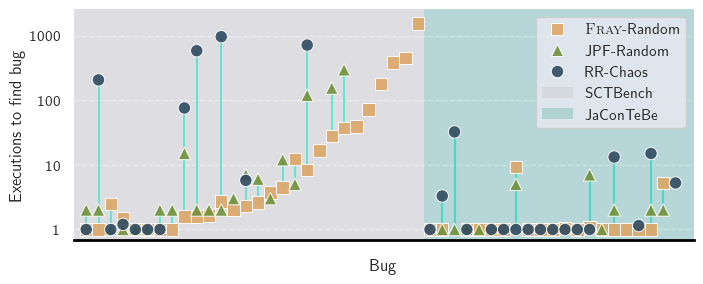

In [12]:
suite = BenchmarkSuite([
    "/home/aoli/repos/fray-benchmark/output/exec-1/sctbench",
    "/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe",
    ])
ax = suite.generate_search_space_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/searchspace.pdf", bbox_inches='tight')

['sctbench-20', 'sctbench-23', 'sctbench-2', 'sctbench-3', 'sctbench-10', 'sctbench-15', 'sctbench-5', 'sctbench-14', 'sctbench-1', 'sctbench-12', 'sctbench-7', 'sctbench-27', 'sctbench-11', 'sctbench-22', 'sctbench-18', 'sctbench-21', 'sctbench-26', 'sctbench-17', 'sctbench-4', 'sctbench-16', 'sctbench-25', 'sctbench-8', 'sctbench-13', 'sctbench-24', 'sctbench-19', 'sctbench-9', 'sctbench-6', 'sctbench-0']


/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:374: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0, ylim))


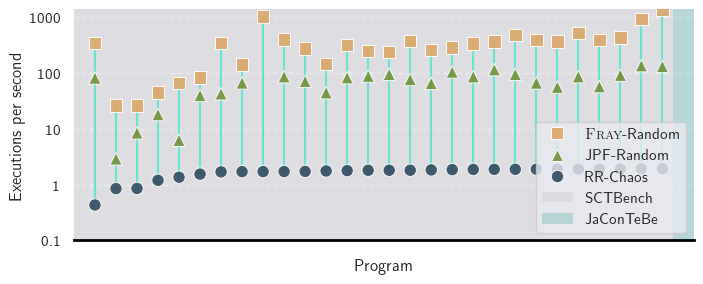

In [15]:
suite = BenchmarkSuite([
    "/home/aoli/repos/fray-benchmark/output/exec-1/sctbench",
    # "/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe",
                        ])
ax = suite.generate_exec_speed_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/execspeed.pdf", bbox_inches='tight')

,id,trial,error,type,bug_time,bug_iter,total_time,total_iter,Technique
30,sctbench-10,iter-0,Error,NaN,840,1,600.0,795,RR-Chaos
31,sctbench-11,iter-0,Error,NaN,643,1,600.0,1102,RR-Chaos
32,sctbench-12,iter-0,Error,NaN,619,1,600.0,1135,RR-Chaos
41,sctbench-20,iter-0,Error,NaN,1018,1,600.0,130,RR-Chaos
42,sctbench-21,iter-0,Error,NaN,448,1,600.0,1103,RR-Chaos
43,sctbench-22,iter-0,Error,NaN,7400,10,600.0,1102,RR-Chaos
50,sctbench-4,iter-0,Error,NaN,60471,114,600.0,1121,RR-Chaos
51,sctbench-5,iter-0,Error,NaN,879,1,600.0,1021,RR-Chaos
83,jacontebe-0,iter-0,Error,NaN,30835,1,600.0,24,RR-Chaos
84,jacontebe-1,iter-0,Error,NaN,31316,1,600.0,22,RR-Chaos


/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:351: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  ax.fill_between([len(sct_list) - 0.5, xlim], y1=[ylim, ylim], alpha=0.3, linewidth=0.0, facecolor=sns_config.colors[-2], label="JaConTeBe")
/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:370: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_xticklabels([])


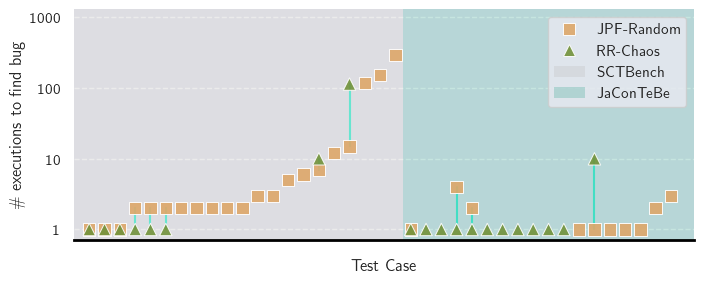

,id,trial,time,error,iter,type,Technique,exec
144,NoError,NaN,-1,-1,600.86,51516,JPF-Random,-600.860000
165,NoError,NaN,-1,-1,600.59,42699,JPF-Random,-600.590000
145,NoError,NaN,-1,-1,600.59,33710,JPF-Random,-600.590000
142,NoError,NaN,-1,-1,600.57,3806,JPF-Random,-600.570000
140,NoError,NaN,-1,-1,600.56,79514,JPF-Random,-600.560000
...,...,...,...,...,...,...,...,...
97,Error,NaN,824,0,600.15,207764,$\textsc{Fray}$-Random,0.728337
191,Error,NaN,775,1,600.00,1030,RR-Chaos,0.774194
181,Error,NaN,767,1,600.00,306,RR-Chaos,0.782269
172,Error,NaN,680,1,600.00,1162,RR-Chaos,0.882353


/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0, ylim))


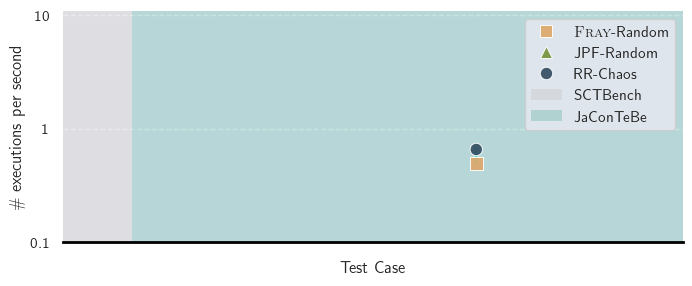

In [4]:
suite = BenchmarkSuite([
    "/home/aoli/repos/fray-benchmark/output/exec-1/sctbench",
])
ax = suite.generate_exec_speed_table()

/usr0/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:338: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.fill_between([0, len(sct_list) + 0.5], y1=[ylim, ylim], alpha=0.3, facecolor=sns_config.colors[-1], hatch="X", linewidth=0.0)


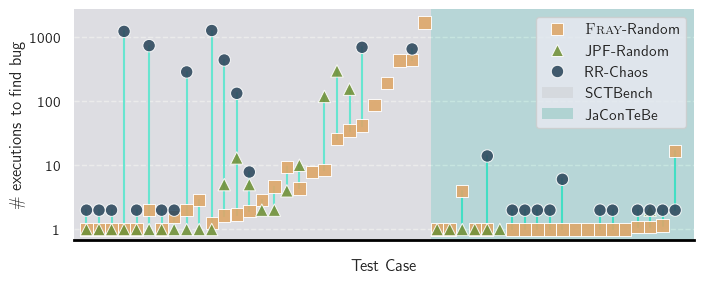

In [66]:
suite = BenchmarkSuite([
    "/home/aoli/repos/fray-benchmark/output/perf-1/sctbench",
    "/home/aoli/repos/fray-benchmark/output/perf-1/jacontebe",
    ])
ax = suite.generate_search_space_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/searchspace.pdf", bbox_inches='tight')

In [1]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/jacontebe")
ax = suite.generate_search_space_table()

NameError: name 'BenchmarkSuite' is not defined

,Technique,id,exec
0,$\textsc{Fray}$-Random,0,0.220038
1,$\textsc{Fray}$-Random,1,0.186270
2,$\textsc{Fray}$-Random,2,0.409375
3,$\textsc{Fray}$-Random,4,0.049537
4,$\textsc{Fray}$-Random,5,0.174149
5,$\textsc{Fray}$-Random,6,0.185113
6,$\textsc{Fray}$-Random,7,0.203782
7,$\textsc{Fray}$-Random,8,0.212129
8,$\textsc{Fray}$-Random,9,1045.198793
9,$\textsc{Fray}$-Random,10,0.143567


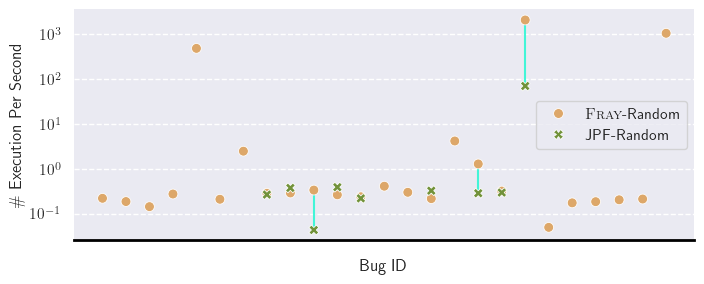

In [30]:
suite = BenchmarkSuite("/home/aoli/repos/fray-benchmark/output/perf-1/jacontebe")
ax = suite.generate_exec_speed_table()

,time,trial,Technique,sum
791,32.99,iter-8,RR-Chaos,12.0


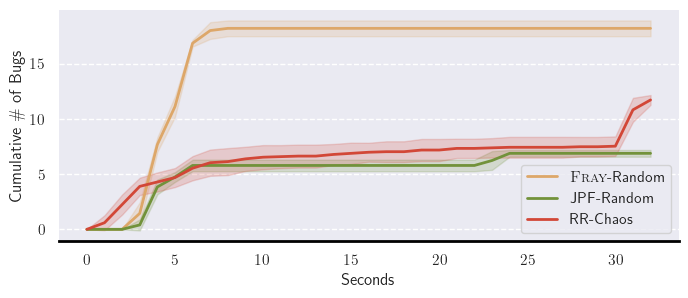

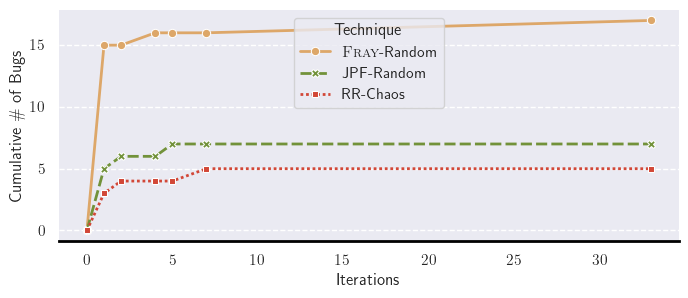

In [6]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.generate_bug_over_time_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-iter.pdf", bbox_inches='tight')

In [12]:
import pandas as pd

suite = BenchmarkSuite(["/usr0/home/aoli/repos/fray-benchmark/output/bug-1/guava"])
print(suite.generate_bug_table().to_latex(index=False))

/usr0/home/aoli/repos/fray-benchmark/output/bug-1/guava/rr/iter-0/266
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/guava/rr/iter-0/500
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/guava/rr/iter-0/853
\begin{tabular}{lrrl}
\toprule
Technique & Test Run & Failure & Time (FP) \\
\midrule
$\textsc{Fray}$-PCT & 1193 & 61 & 326 (176) \\
$\textsc{Fray}$-POS & 1193 & 61 & 226 (176) \\
$\textsc{Fray}$-Random & 1193 & 61 & 326 (176) \\
JPF-Random & 0 & 0 & 0 (0) \\
RR-Chaos & 1191 & 1 & 0 (0) \\
\bottomrule
\end{tabular}



In [34]:
suite = BenchmarkSuite("/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene")
print(suite.generate_bug_table().to_latex(index=False))

/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene/pos
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene/random
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene/pct15
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene/jpf
/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene/rr
\begin{tabular}{lrrl}
\toprule
Technique & Test Run & Failure & Time (FP) \\
\midrule
$\textsc{Fray}$-PCT & 1183 & 2 & 7 (3) \\
$\textsc{Fray}$-POS & 1183 & 4 & 12 (8) \\
$\textsc{Fray}$-Random & 1183 & 0 & 7 (2) \\
JPF-Random & 0 & 0 & 0 (0) \\
RR-Chaos & 1179 & 0 & 0 (0) \\
\bottomrule
\end{tabular}

